In [1]:
%matplotlib inline
import numpy
import sklearn
import matplotlib.pyplot as plt
from numpy import genfromtxt
import numpy as np
from random import randint
import PIL.Image
from cStringIO import StringIO
import IPython.display
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
X_train = genfromtxt('notMNIST_train_data.csv', delimiter=',')
y_train = genfromtxt('notMNIST_train_labels.csv', delimiter=',')
X_test = genfromtxt('notMNIST_test_data.csv', delimiter=',')
y_test = genfromtxt('notMNIST_test_labels.csv', delimiter=',')
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

In [3]:
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [4]:
n = randint(1, 1000)
label = y_test[n]
im = X_test[n, :].reshape((28, 28))
print(label)
showarray(im)

1.0


In [5]:
X_new_train = X_train
X_new_test = X_test

In [6]:
X_new_train = StandardScaler().fit_transform(X_train)
X_new_test = StandardScaler().fit_transform(X_test)

In [11]:
clf_l1_LR = LogisticRegression(C=10,penalty='l1',tol = 0.01)
clf_l1_LR.fit(X_new_train, y_train)
w = clf_l1_LR.coef_
print("score with L1 penalty: %.4f" % clf_l1_LR.score(X_test, y_test))
w_min, w_max = np.min(w), np.max(w)
wimg = (w - w_min) / (w_max-w_min)

score with L1 penalty: 0.9528


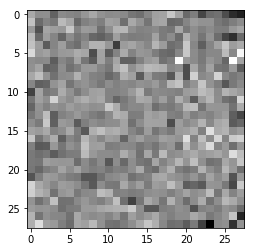

In [12]:
plt.imshow(np.abs(wimg.reshape(28, 28)), interpolation='nearest',cmap='binary', vmax=1, vmin=0)

In [16]:
clf_l2_LR = LogisticRegression(C=0.01, penalty='l2', tol=0.01)
clf_l2_LR.fit(X_new_train, y_train)
w = clf_l2_LR.coef_
print("score with L1 penalty: %.4f" % clf_l2_LR.score(X_test, y_test))
w_min, w_max = np.min(w), np.max(w)
wimg = (w - w_min) / (w_max-w_min)

score with L1 penalty: 0.9600


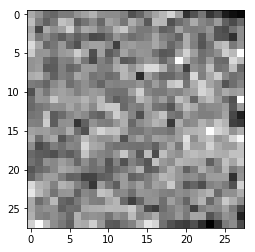

In [17]:
plt.imshow(np.abs(wimg.reshape(28, 28)), interpolation='nearest',cmap='binary', vmax=1, vmin=0)